In [ ]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data = pd.read_csv("/content/sample_data/spam.csv")
print(data.head())
data.count()

   Category                                            Message
0         1  Redeem your prize: http://bit.ly/reward to get...
1         1                          Click here! You won $100!
2         1                         Click here! You won $5000!
3         1                            Act fast! You won $100!
4         1  Congratulations! Act fast to receive $5000 or ...


,0
Category,9575
Message,9575


/tmp/ipython-input-3205015298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Category_str'], palette=palette)


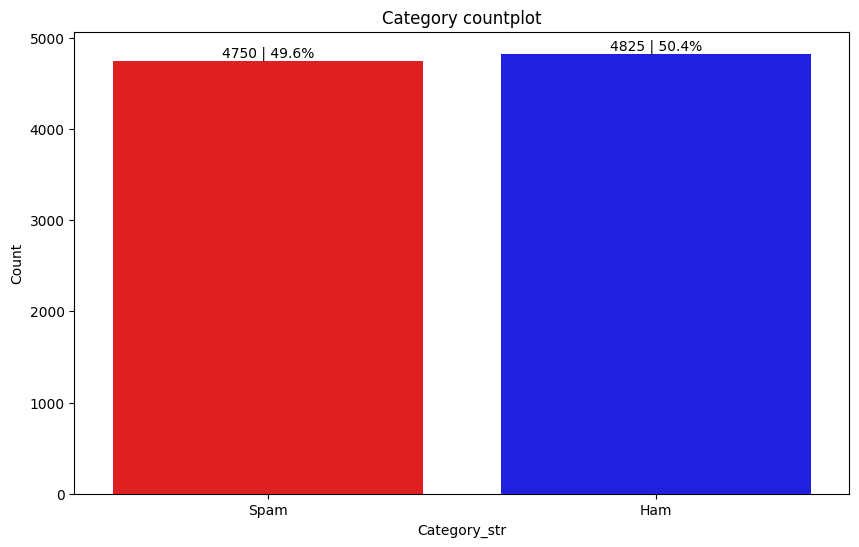

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric categories to string labels
data['Category_str'] = data['Category'].map({0: 'Ham', 1: 'Spam'})

plt.figure(figsize=(10, 6))
plt.title('Category countplot')
plt.ylabel('Count')

# Custom palette: Ham -> blue, Spam -> red
palette = {'Ham': 'blue', 'Spam': 'red'}

ax = sns.countplot(x=data['Category_str'], palette=palette)

total = len(data['Category_str'])
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total * 100
    # Add a small vertical offset (+3) so text is above the bar
    ax.annotate(f'{count} | {percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
data_balanced = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
def clean_text(text):
  text = text.lower() # lowercase
  text = re.sub(r"http\S+", "", text) # remove URLs
  text = text.translate(str.maketrans("", "", string.punctuation)) # remove punctuation
  text = re.sub(r"\d+", "", text) # remove numbers
  text = text.strip()
  return text

In [ ]:
data["clean_message"] = data["Message"].apply(clean_text)

In [ ]:
print(data.head)

<bound method NDFrame.head of       Category                                            Message  \
0            1  Redeem your prize: http://bit.ly/reward to get...   
1            1                          Click here! You won $100!   
2            1                         Click here! You won $5000!   
3            1                            Act fast! You won $100!   
4            1  Congratulations! Act fast to receive $5000 or ...   
...        ...                                                ...   
9570         1  This is the 2nd time we have tried 2 contact u...   
9571         0               Will ü b going to esplanade fr home?   
9572         0  Pity, * was in mood for that. So...any other s...   
9573         0  The guy did some bitching but I acted like i'd...   
9574         0                         Rofl. Its true to its name   

     Category_str                                      clean_message  
0            Spam              redeem your prize  to get your iphone  

In [ ]:
X = data["clean_message"]
y = data["Category"] # 0 = ham, 1 = spam


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(data.head)

<bound method NDFrame.head of       Category                                            Message  \
0            1  Redeem your prize: http://bit.ly/reward to get...   
1            1                          Click here! You won $100!   
2            1                         Click here! You won $5000!   
3            1                            Act fast! You won $100!   
4            1  Congratulations! Act fast to receive $5000 or ...   
...        ...                                                ...   
9570         1  This is the 2nd time we have tried 2 contact u...   
9571         0               Will ü b going to esplanade fr home?   
9572         0  Pity, * was in mood for that. So...any other s...   
9573         0  The guy did some bitching but I acted like i'd...   
9574         0                         Rofl. Its true to its name   

     Category_str                                      clean_message  
0            Spam              redeem your prize  to get your iphone  

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = model_nb.predict(X_test_tfidf)
print("\n=== Classification Report (Naive Bayes) ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


=== Classification Report (Naive Bayes) ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.97      0.98       950

    accuracy                           0.98      1915
   macro avg       0.98      0.98      0.98      1915
weighted avg       0.98      0.98      0.98      1915

Accuracy: 0.983289817232376


AUC Score: 0.9960


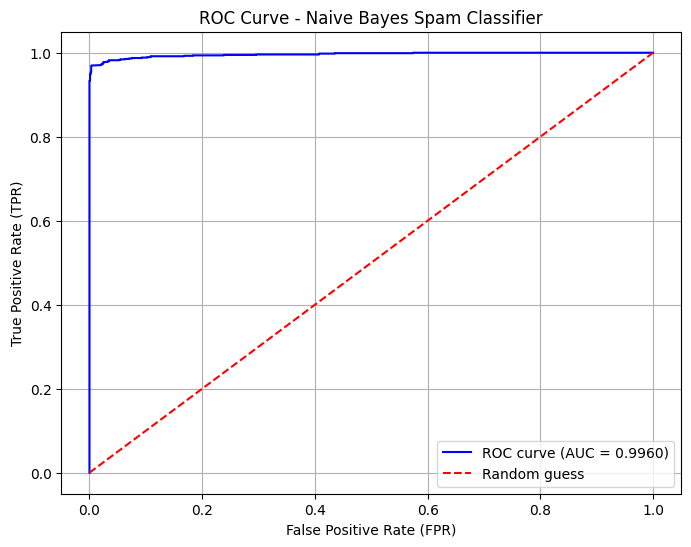

In [ ]:
# -----------------------------
# ROC Curve for Naive Bayes
# -----------------------------
# Get predicted probabilities for the positive class (Spam)
y_prob = model_nb.predict_proba(X_test_tfidf)[:, 1]

# Compute FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Naive Bayes Spam Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
def predict_message(message):
  msg_clean = clean_text(message)
  msg_vec = vectorizer.transform([msg_clean])
  pred = model_nb.predict(msg_vec)[0]
  return "Spam" if pred == 1 else "Ham"

In [ ]:
print("\nPrediction Example:")
print("'Congratulations! You won a lottery.' ->", predict_message("Congratulations! You won a lottery."))
print("'Are we still meeting tomorrow?' ->", predict_message("Are we still meeting tomorrow?"))
print("'you are phished! click here to get safe!!' ->", predict_message("you are phished! click here to get safe!!"))
print("'subscribe to this channel!' ->", predict_message("subscribe to this channel!"))


Prediction Example:
'Congratulations! You won a lottery.' -> Spam
'Are we still meeting tomorrow?' -> Ham
'you are phished! click here to get safe!!' -> Spam
'subscribe to this channel!' -> Spam


In [ ]:
print("'Hi!! how are you?' ->", predict_message("Hi!! how are you?"))

'Hi!! how are you?' -> Ham


In [ ]:
print("'Congratulations! You won a lottery.' ->", predict_message("Congratulations! You won a lottery."))
print("'you are phished! click here to get safe!!' ->", predict_message("you are phished! click here to get safe!!"))

'Congratulations! You won a lottery.' -> Spam
'you are phished! click here to get safe!!' -> Spam


In [ ]:
print("'i like to eat a lot' ->", predict_message("i like to eat a lot"))
print("'subscribe to this channel!' ->", predict_message("subscribe to this channel!"))

'i like to eat a lot' -> Ham
'subscribe to this channel!' -> Spam


In [ ]:
import joblib

# Save model and vectorizer
joblib.dump(model_nb, "spam_model.pkl")



['spam_model.pkl']

In [ ]:
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']